# Assignment Instructions
## Completing the Assignment  
1. Fill in your STUDENTID (abc123) in the code block below.
2. Fill in any place that says `#YOUR CODE HERE` with python code that implements the indicated function.
3. When filling in `#YOUR CODE HERE` sections, remove or comment out the line  `raise NotImplementedError()`, or else you will lose all credit for that function.
4. Fill in any place that says `YOUR ANSWER HERE` with appropriate markdown text. This usually indicates a manually graded cell.

## Assignment Submission Checklist  
Before you submit this assignment for grading, you must do the following or you risk losing points. 
1. **Remove Extraneous prints** Long prints _might_ confuse the grader. If they do, you lose points.
2. **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart)
3. **Run all cells** (in the menubar, select Cell$\rightarrow$Run All).  
  - If any cell that contains code throws an exception or does not compile, fix it and restart this checklist 
  - If a grading cell throws an exception, you will not recieve any credit for that cell
4. **Save the notebook** This ensures that any graphs or plots are in the submission   
  - Do NOT rename your notebook. It must have the same name that was downloaded, or the grading will fail.  
5. **Zip up the assignment notebook(s) and any files required to run the notebook**
  - You must put your files into a `.zip` file with the same name that was used to download the assignment. For example `ASnn.zip` or `PRnn.zip` where nn is a two digit, zero padded number.
  - All files must be in the root of the zip file, NOT in a subdirectory

By submitting this notebook for grading, you affirm that all work was produced by the author identified below, and that references are included for all use of public source material (to include code, data, diagrams, pictures, and verbatim text).

In [1]:
STUDENTID = "tfs436"

---

# AS07: Modeling Concepts
**Version:**  1.5  
**Total Points:** 5

## Objective
The objective of this assignment is to become familiar with the variety of capabilities in the SciPy and Scikit-learn libraries.


## Data Sources
We'll be using synthetic data for this assignment. Scikit-learn has a variety of synthetic data set producers.  
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets


## Instructions

Be sure to read the instructions and guidelines provided for each portion of this assignment.  The number of points earned is in parenthesis next to the description in the table of contents below.

[Setup](#Setup)  

**Statistical Distributions**  
[Uniform Distribution](#Uniform-Distribution)  
[Normal Distribution](#Normal-Distribution)  
[Laplace Distribution](#Laplace-Distribution)  
[Cauchy Distribution](#Cauchy-Distribution)  
[Chi Squared Distribution](#Chi-Squared-Distribution)

 
[Exercise 1](#Exercise-1)  
- Polynomial Model Generator (0.4)
- Create a model and split some data (0.2)
- Plot the model and truth (0.2)

[Exercise 2](#Exercise-2)  
- Polynomial Regression model (0.5)
- Train multiple models (0.5)
- Visualize the results (0.1)

[Exercise 3](#Exercise-3) 
- regression metrics (0.5)
- plot regression metrics (0.2)

[Exercise 4](#Exercise-4)  
- class distribution (0.2)
- PCA (0.3)

[Exercise 5](#Exercise-5)   
- kNN model (0.2)
- classification metrics (0.5)
- plot classification metrics (0.2)
- plot confusion matrix (0.2)  

[Exercise 6](#Exercise-6)
- kNN again with PCA (0.5)
- plot classification metrics (0.2)
- Which did better on f1-score (0.1)

[Instructions](#Instructions)

## Setup
You will need to run this section each time you start this notebook. 

In [2]:
# Imports and globals for this exercise
# Setup notebook for interactive graphics
%matplotlib notebook
# mainline tools
import os
import tarfile
import re
# data tools
import numpy  as np
import pandas as pd
import scipy  as sp
import scipy.stats as stats
# NOTE: scikit-learn classes and functions will be imported locally

# plotting and graphics
import matplotlib        as mpl
import matplotlib.pyplot as plt
import matplotlib.dates  as mdates
import mplleaflet 
# Use seaborn theme, scaling, and color palette.
import seaborn as sns
sns.set()
# Styling seems more consistent if set using MPL instead of sns
plt.style.use('seaborn-whitegrid')

# Set paths to directories for the data
dataroot = os.environ['DATASETS_ROOT']


## Statistical Distributions
The code in this section simply illustrates visually how some of the statistical distributions vary. There are no exercise points in this section, but you might want to look at the code and play with it a bit.

This first function plots the pdf for a given random number generator as well as a histogram of the first 1000 random numbers.

[Instructions](#Instructions)

In [3]:
def gutl_plot_random_pdf( fignum, rvgen, label=None, txtloc=(0,1) ):
    # Set up the figure
    fig, ax = plt.subplots(num=fignum, nrows=1, ncols=1, figsize=[5,5], dpi=100, clear=True)
    # Generate a set of random numbers and plot
    r = rvgen.rvs(size=1000)
    ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
    # Show the pdf
    x = np.linspace(rvgen.ppf(0.01), rvgen.ppf(0.99), 100)
    ax.plot(x, rvgen.pdf(x), 'r-', lw=5, alpha=0.6, label=label)
    if label:
        ax.legend(loc='best', frameon=False)
    # Turn off borders 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)    
    # Put a very light x grid
    ax.grid(alpha=0.3)
    # Show the central moments
    m, v, s, k = rvgen.stats(moments='mvsk')
    txt = '    Mean: {:.2}\nVariance: {:.2}\n    Skew: {:.2}\nKurtosis: {:.2}\n'.format(m, v, s, k)
    font = {'family': 'monospace', 'color':  'white', 'weight': 'normal', 'size': 10 }
    nMargin = 0.02
    if txtloc[0] == 0:
        xloc = 0 + nMargin
        halign = 'left'
    else:
        xloc = 1 - nMargin
        halign = 'right'
        
    if txtloc[1] == 0:
        yloc = 0 + nMargin
        valign = 'bottom'
    else:
        yloc = 1 - nMargin
        valign = 'top'
        
    plt.text(xloc, yloc, txt, fontdict=font, bbox=dict(facecolor='black', alpha=0.9),
             horizontalalignment=halign, verticalalignment=valign, transform=ax.transAxes)
    
    plt.show()
    fig.tight_layout()


### Uniform Distribution
SciPy: https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous_uniform.html

In [4]:
# Set state of random generatator and create a frozen generator
np.random.seed(seed=1234)
# In the standard form, the distribution is uniform on [0, 1]. 
# Using the parameters loc and scale, one obtains the uniform distribution on [loc, loc + scale].
rMin   = -1
rRange = 2
rvgen = stats.uniform(loc=rMin, scale=rRange)
# Plot it
gutl_plot_random_pdf(1, rvgen, 'Uniform pdf', txtloc=(0,0))

<IPython.core.display.Javascript object>

### Normal Distribution
AKA Gaussian  
SciPy: https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous_norm.html

In [5]:
# Set state of random generatator and create a frozen generator
np.random.seed(seed=1234)
# Normal distribution uses the familiar mean and standard deviation
nMean = 0
nStd = 1
rvgen = stats.norm(loc=nMean, scale=nStd)
# Plot it
gutl_plot_random_pdf(2, rvgen, 'Normal pdf', (0,1))


<IPython.core.display.Javascript object>

### Laplace Distribution
See [Wikipedia article](https://en.wikipedia.org/wiki/Laplace_distribution) for the math  
SciPy: https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous_laplace.html

In [6]:
# Set state of random generatator and create a frozen generator
np.random.seed(seed=1234)
# Laplace uses a mean and a beta parameter for scaling
nMean = 0
nBeta = 1
rvgen = stats.laplace(loc=nMean, scale=nBeta)
# Plot it
gutl_plot_random_pdf(3, rvgen, 'Laplace pdf', (0,1))

<IPython.core.display.Javascript object>

### Cauchy Distribution
See [Wikipedia article](https://en.wikipedia.org/wiki/Cauchy_distribution) for the math  
SciPy: https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous_cauchy.html

In [7]:
# Set state of random generatator and create a frozen generator
np.random.seed(seed=10)
# Couchy is just weird
rvgen = stats.cauchy(loc=0, scale=1)
# Plot it
gutl_plot_random_pdf(4, rvgen, 'Cauchy pdf', (0,1))

<IPython.core.display.Javascript object>

### Chi Squared Distribution

SciPy: https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous_chi2.html

In [8]:
# Set state of random generatator and create a frozen generator
np.random.seed(seed=42)
# Chi squared uses a degrees of freedom parameter, df
rvgen = stats.chi2(df=4, loc=0, scale=1)
# Plot it
gutl_plot_random_pdf(5, rvgen, 'ChiSquared pdf', (1,0))

<IPython.core.display.Javascript object>

## Exercise 1

In this exercise we'll create a simple regression model.

[Instructions](#Instructions)

**Points: 0.4**  
The first task is to define a simple polynomial model generator where you can set the statistical distribution of the error that is imposed on the model.
- the X input can be a list or a numpy array (1 dimensional)
- you will need to reshape it to a single column matrix
- Using the X values and the weights (coefficients), calculate a set of 'truth' values, Yt, where: $Y_t = w_0*X^0 + w_1*X^1 + ... w_n*X^n$
- Use the random number generator to add a random number to every Yt value to create the Y vector
- return the tuple (X, Y, Yt)




In [74]:
def make_polynomial_model(X, W, rvgen):
    '''
    x is a numpy array of input points
    W - is a list of weights (coefficients) [w0, w1, w2,... wn] for y = w0 + w1*X + w2*X**2 + ... + wn*X**n etc
    rvgen is a frozen random number generator used to perturb the data.
    returns (X, Y, Yt) all as numpy column vectors
    '''
    x = np.asarray(X)
    x = x.reshape(len(x),1)
    yt = 0
    for i in np.arange(len(W)):
        yt = yt + W[i] * (x ** i)
    yt = yt.reshape(len(yt),1)
    y = []
    r = rvgen.rvs(size = len(yt))
    for i in np.arange(len(yt)):
        y = np.append(y, yt[i] + r[i])
    y = y.reshape(len(y),1)
    return (x,y,yt)

In [75]:
## This is an automatically graded test cell.
# The public tests help you determine whether your solutions are correct.                          
# It also contains hidden tests that are run by the autograder.

Xin = [0, .1, .2, .3, .4]
W = [.5, 1, .2]
np.random.seed(seed=42)
rvgen = stats.norm()
(X, Y, Yt) = make_polynomial_model(Xin, W, rvgen) 

# Public tests (make sure your function passes these tests)
# ---------------------------------------------------------
assert isinstance(X, np.ndarray )
assert isinstance(Y, np.ndarray )
assert isinstance(Yt, np.ndarray )
assert Yt.shape == (5,1)
np.testing.assert_almost_equal(Yt, [[0.5],[0.602], [0.708], [0.818], [0.932]], decimal=3, err_msg='Incorrect Yt', verbose=True)
np.testing.assert_almost_equal(Y, [[0.997], [0.464], [1.356], [2.341], [0.698]], decimal=3, err_msg='Incorrect Y', verbose=True)


**Points: 0.2**  
Create a simple model and split it into test and training sets
- For X, generate 100 samples linearly spaced between 0 and 7
- The equation for your model is $Y_t = 0.5*X^0 -2.0*X^1 + 1.0*X^2$
- Use a laplace distribution for your noise with loc=0 and scale=3
- Use a seed of `12345` for the random number generator when making the model
- Split X and Y into training and test sets using a random seed of `0` when permforming the split


In [76]:
from sklearn.model_selection import train_test_split
from scipy.stats import norm

# Your code must define X, Y, Yt, X_train, X_test, Y_train, Y_test
X = np.linspace(0, 7, 100, endpoint=True)
X = X.reshape(len(X),1)
Yt = 0.5 * (X ** 0) - 2.0 * (X ** 1) + 1.0 * (X ** 2)
Yt = Yt.reshape(len(Yt),1)
np.random.seed(seed=12345)
s = np.random.laplace(loc = 0, scale = 3,size = len(Yt))
Y = []
for i in np.arange(len(Yt)):
    Y = np.append(Y, Yt[i] + s[i])
Y = Y.reshape(len(Y),1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)


In [77]:
## This is an automatically graded test cell.
# The public tests help you determine whether your solutions are correct.                          
# It also contains hidden tests that are run by the autograder.

# Public tests (make sure your function passes these tests)
# ---------------------------------------------------------
assert X.shape == (100,1)
assert Y.shape == (100,1)
assert Yt.shape == (100,1)
assert X_train.shape == (75,1)
assert Y_train.shape == (75,1)
assert X_test.shape == (25,1)
assert Y_test.shape == (25,1)

np.testing.assert_almost_equal(X[0], 0.0, decimal=3)
np.testing.assert_almost_equal(X[50], 3.535, decimal=3)
np.testing.assert_almost_equal(X[99], 7.0, decimal=3)
np.testing.assert_almost_equal(Yt[0], 0.5, decimal=3)
np.testing.assert_almost_equal(Yt[50], 5.928, decimal=3)
np.testing.assert_almost_equal(Yt[99], 35.5, decimal=3)

np.testing.assert_almost_equal(X_train[0:3,0], [3.393, 0.424, 7.000], decimal=3)
np.testing.assert_almost_equal(X_train[72:75,0], [4.525, 3.323, 3.111], decimal=3)
np.testing.assert_almost_equal(Y_train[72:75,0], [7.789, 4.643, 1.479], decimal=3)
np.testing.assert_almost_equal(X_test[0:3,0], [1.838, 6.0808, 0.1414], decimal=3)


**Points: 0.2**  
Write a function to draw a plot of the training and test data along with the other values.
- scheme has already been set in the setup section, so just use matplotlib functions
- scatter plot the training data points in blue, alpha = 0.5
- scatter plot the test data points in purple, alpha = 0.5
- The dataframe must contain a column named X
- All other columns in the dataframe should be plotted agaist X as line plots
- The column names become the legend labels
- Each line should be in a different color. Specific order doesn't matter, but use `colors=['green', 'brown', 'purple', 'cyan', 'yellow']`
- Figure size should be [7,5] with 100 dpi
- Use "best" for the legend location



In [78]:
#https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386
#https://towardsdatascience.com/polynomial-regression-bbe8b9d97491
def plot_ml_data( fignum, X_train, Y_train, X_test, Y_test, dfFits ):
    '''
    This function plots a data set to see how training or testing is progressing.
    The first four arguments are self explanatory
    dfFits is a data frame with one column named 'X', and other columns representing the results
           of fitting the X values to a model. The column name is used as the label.
    '''
    fig, ax = plt.subplots(num=fignum, nrows=1, ncols=1, figsize=[7,5], dpi=100, clear=True)
    ax.plot(X_train, Y_train, 'o',alpha=0.5,label = 'Training data',color = 'blue')
    ax.plot(X_test, Y_test, 'o',alpha=0.5,label = 'Test data',color = 'purple')
    colors=['green', 'brown', 'purple', 'cyan', 'yellow']
    dfFits = dfFits.set_index('X')
    i = 0
    for col in dfFits.columns.values:
        dfFits[col].plot(legend=True,color = colors[i])
        i+=1
    ax.set_xlabel('X')
    ax.legend(loc='best', frameon=False)
    

Now we'll plot the data for a first look. Figure should look like this:
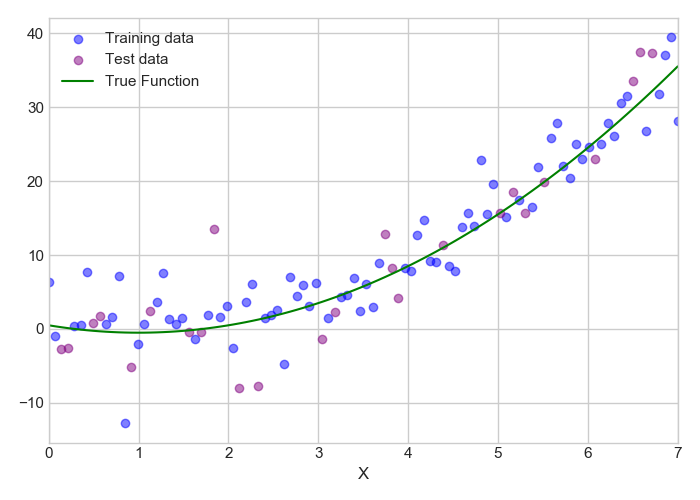

<IPython.core.display.Javascript object>


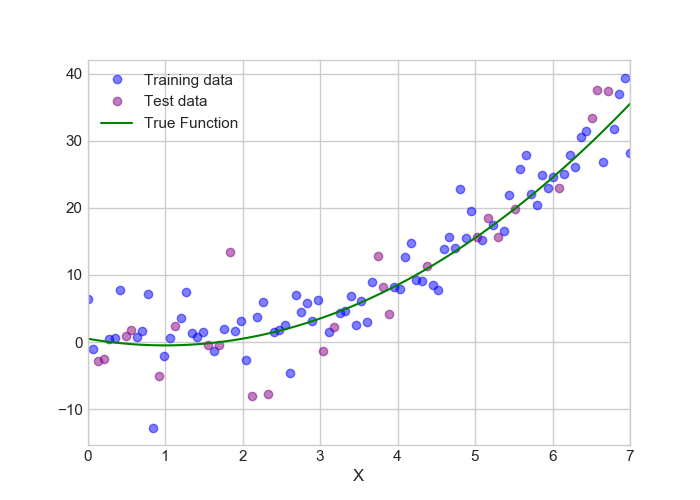

In [79]:
# Create a dataframe from X and Yt so we can plot it
df = pd.DataFrame()
#x = X.tolist()
#yt = Yt.tolist()
x = np.linspace(0, 7, 100, endpoint=True)
yt = 0.5 * (x ** 0) - 2.0 * (x ** 1) + 1.0 * (x ** 2)
df = pd.DataFrame({'X':x,'True Function':yt})
plot_ml_data( 6, X_train, Y_train, X_test, Y_test, df )



## Exercise 2
In this exercise, we'll use linear regression to fit our data.

[Instructions](#Instructions)

**Points: 0.5**  
Write a function that trains a polynomial model
- inputs are X and Y and the polynomial order
- returns a trained model

Write a companion function that predicts Y values based on the model
- inputs are the X, the trained model, and the order
- returns Y as a numpy column array

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def poly_model_train( X, Y, nOrder ):
    poly = PolynomialFeatures(degree = nOrder) 
    X_poly = poly.fit_transform(X) 

    poly.fit(X_poly, Y) 
    lin2 = LinearRegression()
    y_poly_train = lin2.fit(X_poly, Y)
    return y_poly_train
    
    

In [81]:
#LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
def poly_model_predict( X, mdl, nOrder):
    poly = PolynomialFeatures(degree = nOrder) 
    X_poly = poly.fit_transform(X) 
    y_poly_pred = mdl.predict(X_poly)
    return y_poly_pred

In [82]:
## This is an automatically graded test cell.
# The public tests help you determine whether your solutions are correct.                          
# It also contains hidden tests that are run by the autograder.
mdl = poly_model_train(X_train, Y_train, 2)
# Public tests (make sure your function passes these tests)
# ---------------------------------------------------------
np.testing.assert_almost_equal(mdl.coef_, [[  0., -2.378,  1.026]], decimal=3)
np.testing.assert_almost_equal(mdl.intercept_, 2.2776, decimal = 4)

In [83]:
## This is an automatically graded test cell.
# The public tests help you determine whether your solutions are correct.                          
# It also contains hidden tests that are run by the autograder.

Y_p = poly_model_predict( X_test, mdl, 2)

# Public tests (make sure your function passes these tests)
# ---------------------------------------------------------
assert (25,1) == Y_p.shape
np.testing.assert_almost_equal( Y_p[20], 4.5295, decimal=4)


**Points: 0.5**  
The next function uses the poly_model_ functions to fit several polynomial orders to prepare to visualize how well the models fit.
- The inputs are `X_train`, `Y_train`, a list of polynomial orders, and the number of points to use for the output
- The output is a dataframe
  - First column named `X` that contains nPoints that are linearly spaced from 5% below to 5% above the min and max values of the input `X`. The 5% is 5% of the range of the given `X_train`, i.e. (Xmax-Xmin). 
  - Next, columns for each of the entries in lOrders, with column name `Order=n` where n is the order. The data in each column is the predicted value for each `X`, based on a trained model of the given order.
  

In [84]:
def fit_poly_lines(X_train, Y_train, lOrders, nPoints):
    x_max = max(X_train) + 0.05 * (max(X_train) - min(X_train))
    x_min = min(X_train) - 0.05 * (max(X_train) - min(X_train))
    X = np.linspace(x_min, x_max, nPoints, endpoint=True)
    
    df = pd.DataFrame({'X':X.ravel()})
    for o in lOrders:
        md = poly_model_train( X_train, Y_train, o)
        Y_p = poly_model_predict( X, md, o)
        df['Order='+str(o)] = Y_p.ravel()
    return (df)    
    

In [85]:
## This is an automatically graded test cell.
# The public tests help you determine whether your solutions are correct.                          
# It also contains hidden tests that are run by the autograder.

# Public tests (make sure your function passes these tests)
# ---------------------------------------------------------
lOrders = [1,2,5,9]
nPoints = 100
df = fit_poly_lines(X_train, Y_train, lOrders, nPoints)
assert sorted(df.columns) == sorted(['X', 'Order=1','Order=2','Order=5','Order=9'])
np.testing.assert_almost_equal(df.loc[0,'X'], -0.350, decimal=3)
np.testing.assert_almost_equal(df.loc[99,'X'], 7.35, decimal=3)
np.testing.assert_almost_equal(df.loc[0,'Order=2'], 3.236, decimal=3)
np.testing.assert_almost_equal(df.loc[99,'Order=2'], 40.215, decimal=3)


**Points: 0.1**  
Plot the results. Should look like this:  
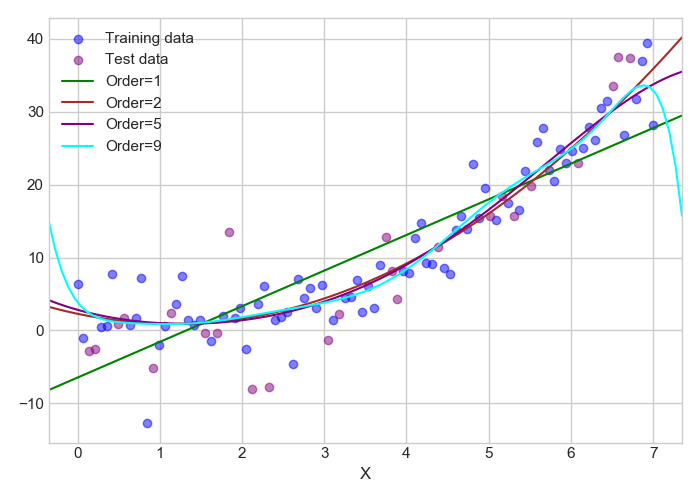

<IPython.core.display.Javascript object>


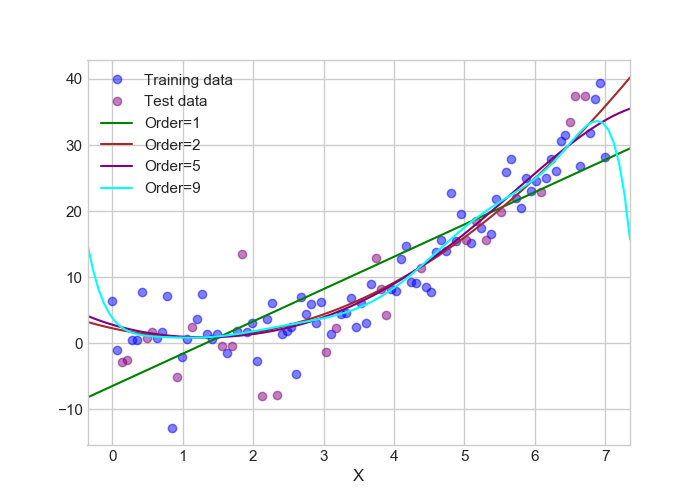

In [86]:
# Use plot_ml_data (figure 7) to show the results.

plot_ml_data( 7, X_train, Y_train, X_test, Y_test, df )

## Exercise 3
In this exercise, we'll work with some regression metrics.

[Instructions](#Instructions)

**Points: 0.5**  
The following function will help evaluate how well a metric performs on our models.
- The first 4 inputs are the usual X_train, Y_train, X_test, Y_test
- nMaxDegree is the maximum degree (inclusive) to use when training a polynomial.
- sName is a name for the metric, which is expected to be one of the names in `metric_names`. If it is not in the list (exact), then raise a ValueError exception.
- Find the corresponding metric function in metric_funcs
- The output is a tuple consisting of a dataframe and a dictionary.
- For the dataframe 
  - The index is the polynomial degree, named `Degree`
  - The first column is the metric for the training data with name `'Train'`
  - The second column is the metric for the test data with name `'Test'`
- In the dictionary, you will be returning the intercept and coefficients of the model.
  - The index is the degree
  - The data is a numpy array (one dimensional) of the weights (coefficients) of the model

In [87]:
#https://www.programcreek.com/python/example/89256/sklearn.metrics.r2_score
from sklearn.metrics.regression import r2_score
from sklearn.metrics.regression import mean_absolute_error
from sklearn.metrics.regression import mean_squared_error

metric_names = ['R2', 'MAE', 'MSE']
metric_funcs = [r2_score, mean_absolute_error, mean_squared_error]

def poly_metrics(X_train, Y_train, X_test, Y_test, nMaxDegree, sName):
    dfM = pd.DataFrame(columns=['Degree','Train','Test'],index=range(nMaxDegree+1))
    diW = {}
    if sName not in metric_names:
        raise ValueError
    if sName == 'R2':
        for d in np.arange(0,nMaxDegree+1):
            md = poly_model_train( X_train, Y_train, d)
            Y_train_pred = poly_model_predict( X_train, md, d)
            r2_train = r2_score(Y_train,Y_train_pred)
            Y_test_pred = poly_model_predict( X_test, md, d)
            r2_test = r2_score(Y_test,Y_test_pred)
            dfM.loc[d].Degree = d
            dfM.loc[d].Train = r2_train
            dfM.loc[d].Test = r2_test
            W = md.coef_.copy()
            W[0,0] = md.intercept_
            diW[d] = W[0]
        dfM.set_index('Degree',inplace = True)
        return (dfM,diW)
    if sName == 'MAE':
        for d in np.arange(0,nMaxDegree+1):
            md = poly_model_train( X_train, Y_train, d)
            Y_train_pred = poly_model_predict( X_train, md, d)
            mae_train = mean_absolute_error(Y_train,Y_train_pred)
            Y_test_pred = poly_model_predict( X_test, md, d)
            mae_test = mean_absolute_error(Y_test,Y_test_pred)
            dfM.loc[d].Degree = d
            dfM.loc[d].Train = mae_train
            dfM.loc[d].Test = mae_test
            W = md.coef_.copy()
            W[0,0] = md.intercept_
            diW[d] = W[0]
        dfM.set_index('Degree',inplace = True)
        return (dfM,diW)
    if sName == 'MSE':
        for d in np.arange(0,nMaxDegree+1):
            md = poly_model_train( X_train, Y_train, d)
            Y_train_pred = poly_model_predict( X_train, md, d)
            mse_train = mean_squared_error(Y_train,Y_train_pred)
            Y_test_pred = poly_model_predict( X_test, md, d)
            mse_test = mean_squared_error(Y_test,Y_test_pred)
            dfM.loc[d].Degree = d
            dfM.loc[d].Train = mse_train
            dfM.loc[d].Test = mse_test
            W = md.coef_.copy()
            W[0,0] = md.intercept_
            diW[d] = W[0]
        dfM.set_index('Degree',inplace = True)
        return (dfM,diW)

In [88]:
## This is an automatically graded test cell.
# The public tests help you determine whether your solutions are correct.                          
# It also contains hidden tests that are run by the autograder.

dfM, diW = poly_metrics(X_train, Y_train, X_test, Y_test, 9, 'R2')

# Public tests (make sure your function passes these tests)
# ---------------------------------------------------------
np.testing.assert_array_equal(list(dfM.columns.values), ['Train', 'Test'])
assert dfM.index.name == 'Degree'
np.testing.assert_almost_equal( dfM.loc[0,'Train'], 0.0, decimal=3)
np.testing.assert_almost_equal( dfM.loc[9,'Test'], 0.855, decimal=3)
np.testing.assert_almost_equal( dfM.loc[9,'Train'], 0.9057, decimal=3)
np.testing.assert_almost_equal( dfM.loc[5,'Test'], 0.8536, decimal=3)


In [89]:
## More tests
# Recall the actual underlying model has W = [0.5, -2, 1]
np.testing.assert_almost_equal(diW[2],[ 2.27762575, -2.3783507 ,  1.02584541], decimal=3)

In [90]:
## More tests

**Points: 0.2**  
Write some code to create 3 side-by-side plots of train versus test error for the metric functions below. Should look like this:
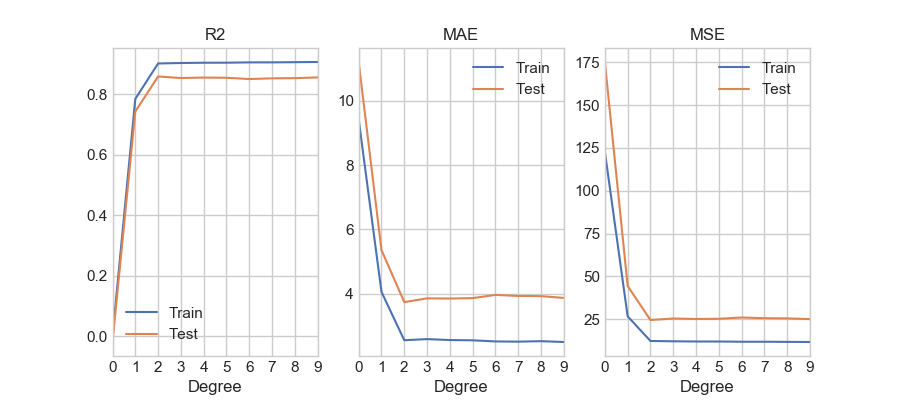

<IPython.core.display.Javascript object>


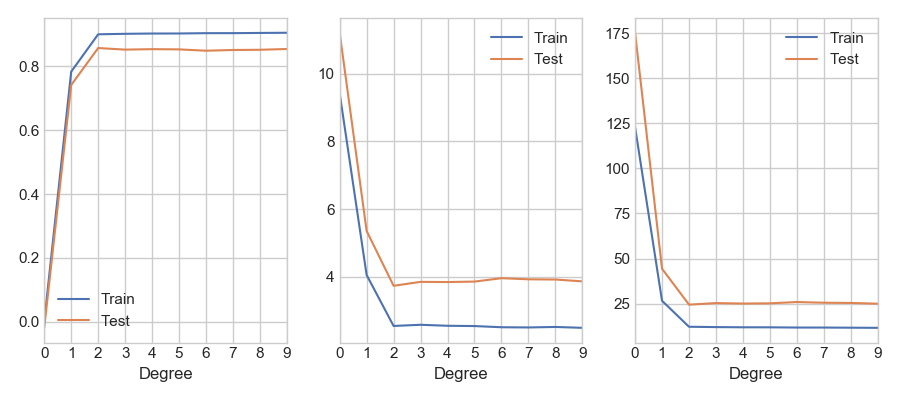

In [92]:
nMaxDegree = 9
fig, axes = plt.subplots(num=8, nrows=1, ncols=3, sharex=True, figsize=[9,4], dpi=100, clear=True)
dfR, diR = poly_metrics(X_train, Y_train, X_test, Y_test, nMaxDegree, 'R2')
dfA, diA = poly_metrics(X_train, Y_train, X_test, Y_test, nMaxDegree, 'MAE')
dfS, diS = poly_metrics(X_train, Y_train, X_test, Y_test, nMaxDegree, 'MSE')

dfR.plot(ax = axes[0])
dfA.plot(ax = axes[1])
dfS.plot(ax = axes[2])

major_ticks = np.arange(0, nMaxDegree+1, 1)
plt.xticks(major_ticks)

plt.show()
fig.tight_layout()

## Exercise 4
For the classification exercises we'll use the scikit-learn version of the Wisconson Breast Cancer dataset.

[Instructions](#Instructions)

In [93]:
from sklearn.datasets import load_breast_cancer

# This loads a scikit-learn bunch (dict like) that has keys
# ['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
cancer = load_breast_cancer()
# Extract the data into a more useful form
X = cancer.data
Y = cancer.target
feature_names = cancer.feature_names
target_names  = cancer.target_names
# Create a test train split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [94]:
# look at the names
print(target_names)
print(feature_names)

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


**Points: 0.2**  
Define a function that will return the class distribution as a series.
- index is the target name
- values are the count of items in that class

In [95]:
def get_class_distribution( Y, target_names ):
    data1 = np.c_[X, Y]
    columns = np.append(feature_names, ["target"])
    cancerdf = pd.DataFrame(data1, columns=columns)
    counts = cancerdf.target.value_counts(ascending=True)
    counts.index = "malignant benign".split()
    return counts

In [96]:
## This is an automatically graded test cell.
# The public tests help you determine whether your solutions are correct.                          
# It also contains hidden tests that are run by the autograder.

sr = get_class_distribution( Y, target_names )

# Public tests (make sure your function passes these tests)
# ---------------------------------------------------------
assert sr['malignant'] == 212



In [97]:
# This is a utility function for plotting a heat map of PCA reductions
def gutl_plot_PCA_heatmap( fignum, pcs, feature_names ):
    # Set up the figure
    fig, ax = plt.subplots(num=fignum, nrows=1, ncols=1, figsize=[10,5], dpi=100, clear=True)
    # Start with an "image" using data as pixels
    im = ax.imshow(pcs, cmap='YlGn')  
    cbar = ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    nRows, nCols = pcs.shape
    ax.set_xticks(np.arange(nCols))
    ax.set_yticks(np.arange(nRows))
    # ... and label them with the respective list entries.
    row_labels = ['PCA{:02}'.format(n) for n in range(0,nRows)]
    ax.set_xticklabels(feature_names)
    ax.set_yticklabels(row_labels)
    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-40, ha="right",
             rotation_mode="anchor")
    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(nCols+1)-.5, minor=True)
    ax.set_yticks(np.arange(nRows+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    fig.tight_layout()
    plt.show()


In [98]:
# Utility to plot a confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def gutil_plot_confusion_matrix(fignum, y_true, y_pred, class_names, normalize=False, 
                                title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # Set up the figure
    fig, ax = plt.subplots(num=fignum, nrows=1, ncols=1, figsize=[5,5], dpi=100, clear=True)
    if not title:
        if normalize:
            title = 'Confusion matrix (Normalized)'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cmat = confusion_matrix(y_true, y_pred)
    (nRows, nCols) = cmat.shape
    # Only use the labels that appear in the data
    classes = class_names[unique_labels(y_true, y_pred)]
    if normalize:
        cmat = cmat.astype('float') / cmat.sum(axis=1)[:, np.newaxis]
        
    # Use image as giant pixels        
    im = ax.imshow(cmat, interpolation='nearest', cmap=cmap)
    cbar = ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set_xticks(np.arange(nCols))
    ax.set_yticks(np.arange(nRows))
    # and label them with the respective list entries
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    ax.set_xlabel('Predicted Class', fontsize=12)
    ax.set_ylabel('True Class', fontsize=12)

    # Rotate the x axis tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Turn spines off 
    for edge, spine in ax.spines.items():
        spine.set_visible(False)
    # Use minor grid to create white lines between the boxes
    ax.set_xticks(np.arange(nCols+1)-.5, minor=True)
    ax.set_yticks(np.arange(nRows+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    # Tone down the major grid lines
    ax.grid(which="major", alpha=0.01)

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cmat.max() / 2.
    for i in range(cmat.shape[0]):
        for j in range(cmat.shape[1]):
            ax.text(j, i, format(cmat[i, j], fmt), ha="center", va="center",
                   color='k' if cmat[i,j] < thresh else 'w')
            
    # And title
    if title:
        ax.set_title(title)
    fig.tight_layout()            
    return ax

**Points: 0.3**  
Write a function to run PCA on the data. 
- There is an optional parameter that if True, first Standardizes the data.
- Returns a tuple
  - First element is the transformed data as a numpy array
  - Second element contains the pca components as a numpy array with size (nComponents, nFeatures) 

In [99]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def run_pca( data, nComponents, bStandardize=True):
    if bStandardize==True:
        data = StandardScaler().fit_transform(data)
    data_x = PCA(n_components=nComponents).fit_transform(data)
    pca = PCA(n_components=nComponents)
    pca.fit(data)
    pcs = pca.components_
    return (data_x,pcs)

In [100]:
## This is an automatically graded test cell.
# The public tests help you determine whether your solutions are correct.                          
# It also contains hidden tests that are run by the autograder.

nComponents = 3
(Xt, pcs) = run_pca(X, nComponents, False)
(Xt_std, pcs_std) = run_pca(X, nComponents, True)

# Public tests (make sure your function passes these tests)
# ---------------------------------------------------------
assert pcs.shape == (nComponents, X.shape[1])
assert Xt.shape == (X.shape[0], nComponents)
np.testing.assert_almost_equal(Xt[0], [1160.1425737 , -293.91754364,   48.57839763], decimal=3)
np.testing.assert_almost_equal(Xt_std[0], [ 9.19283683,  1.94858307, -1.1231662 ], decimal=3)
np.testing.assert_almost_equal(pcs[0,0], 5.08623202e-03, decimal=5)


<IPython.core.display.Javascript object>


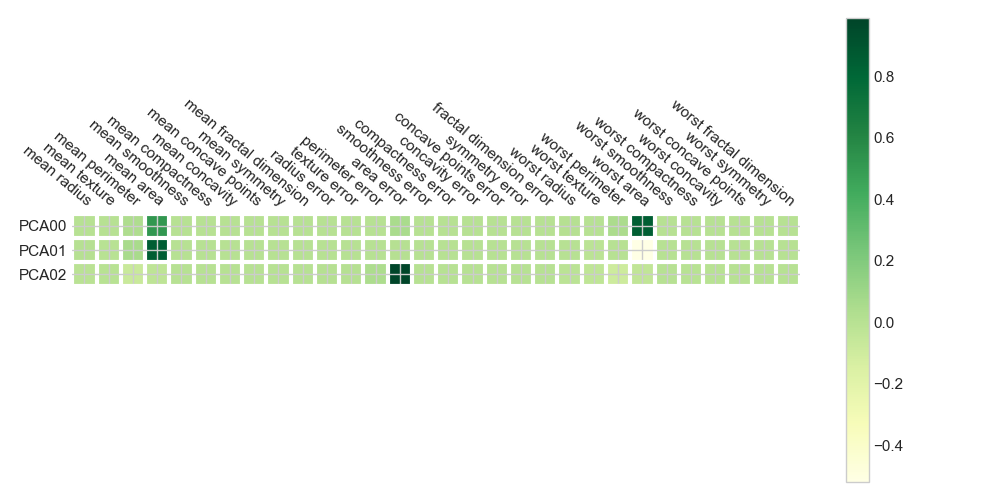

<IPython.core.display.Javascript object>


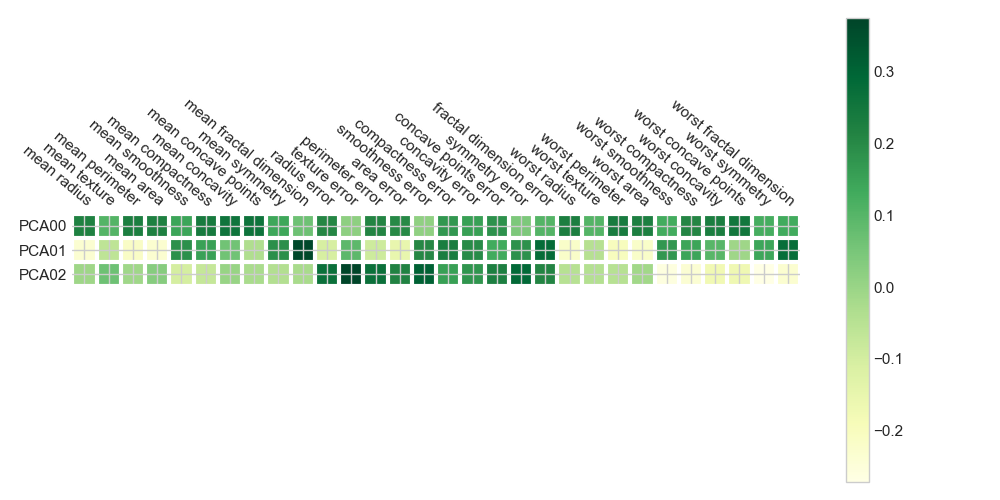

In [101]:
# Compare the principle components with and without Standardizing the data
gutl_plot_PCA_heatmap( 9, pcs, feature_names )
gutl_plot_PCA_heatmap( 10, pcs_std, feature_names )
# Note how much more uniform the component contributions are for the standardized data

## Exercise 5
Using kNN Classification

[Instructions](#Instructions)

**Points: 0.2**  
Define a function to create a k nearest neighbor model
- be sure to standardize the data before training
- return a tuple consisiting of 
  - the trained scaler
  - the trained model

In [102]:
from sklearn.neighbors import KNeighborsClassifier

def fit_knn( X_train, Y_train, nNeighbors, bStandardize=True ): 
    scl = StandardScaler()
    scl.fit(X_train)
    #X_train = StandardScaler().fit_transform(X_train)
    knn = KNeighborsClassifier(n_neighbors = nNeighbors)
    mdl =  knn.fit(X_train,Y_train)  
    return (scl,mdl)

In [103]:
## This is an automatically graded test cell.
# The public tests help you determine whether your solutions are correct.                          
# It also contains hidden tests that are run by the autograder.

(scl, mdl) = fit_knn( X_train, Y_train, 2)
params = mdl.get_params()
X_stst = scl.transform(X_test)

# Public tests (make sure your function passes these tests)
# ---------------------------------------------------------
assert params['leaf_size'] == 30
assert params['n_neighbors'] == 2
assert params['weights'] == 'uniform'

np.testing.assert_almost_equal( X_stst[0,:3], [-0.21395901,  0.3125461 , -0.14355187], decimal=3)


**Points: 0.5**  
The following function will help evaluate how well a metric performs on kNN models.
- The first 4 inputs are the usual X_train, Y_train, X_test, Y_test
- nMaxK is the maximum k value (inclusive) for training a kNN classifier.
- Use the classification_report metric to simultaneously calculate `precision`, `recall`, and `f1-score`
- Use the value calculated for the `malignant` class
- The output is a tuple consisting of two dataframes.
- The first dataframe is for training results, the second is for test results. For both:
  - The index is the K value named `K`
  - The columns are named for their metric


In [104]:
#https://medium.com/@kbrook10/day-11-machine-learning-using-knn-k-nearest-neighbors-with-scikit-learn-350c3a1402e6
from sklearn.metrics.classification import classification_report

def knn_metrics(X_train, Y_train, X_test, Y_test, target_names, nMaxK):
    df_train = pd.DataFrame(columns=['K','precision','recall', 'f1-score'],index=range(nMaxK+1))
    df_test= pd.DataFrame(columns=['K','precision','recall', 'f1-score'],index=range(nMaxK+1))
    scl = StandardScaler()
    scl = scl.fit(X_train)
    X_train = scl.transform(X_train)
    X_test = scl.transform(X_test)
    for k in np.arange(1,nMaxK+1):
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, Y_train)
        pred_train = knn.predict(X_train)
        clf_train = classification_report(Y_train, pred_train,output_dict=True,target_names=target_names)['malignant']
        df_train.loc[k].K = k
        df_train.loc[k].precision = clf_train['precision']
        df_train.loc[k].recall = clf_train['recall']
        df_train.loc[k]['f1-score'] = clf_train['f1-score'] 
        pred_test = knn.predict(X_test)
        clf_test = classification_report(Y_test, pred_test,output_dict=True,target_names=target_names)['malignant']
        df_test.loc[k].K = k
        df_test.loc[k].precision = clf_test['precision']
        df_test.loc[k].recall = clf_test['recall']
        df_test.loc[k]['f1-score'] = clf_test['f1-score']    
    df_train.set_index('K',inplace = True)
    df_train.dropna(inplace = True)
    df_test.set_index('K',inplace = True)
    df_test.dropna(inplace = True)
    return (df_train,df_test)

In [105]:
## This is an automatically graded test cell.
# The public tests help you determine whether your solutions are correct.                          
# It also contains hidden tests that are run by the autograder.
nMaxK = 9
(dfTrn, dfTst) = knn_metrics(X_train, Y_train, X_test, Y_test, target_names, nMaxK)

# Public tests (make sure your function passes these tests)
# ---------------------------------------------------------
np.testing.assert_almost_equal(dfTst['precision'].values[0:5], [0.942308, 0.833333, 0.959184, 0.943396, 0.979167], decimal=4)
assert sorted(dfTrn.columns.values) == sorted(['precision', 'recall', 'f1-score'])
assert dfTst.index.name == 'K'


**Points: 0.2**  
Plot training versus test scores in three side-by-side graphs. 
- specific colors don't matter, they just have to be different
- use "best" location for the legend

They should look like this:
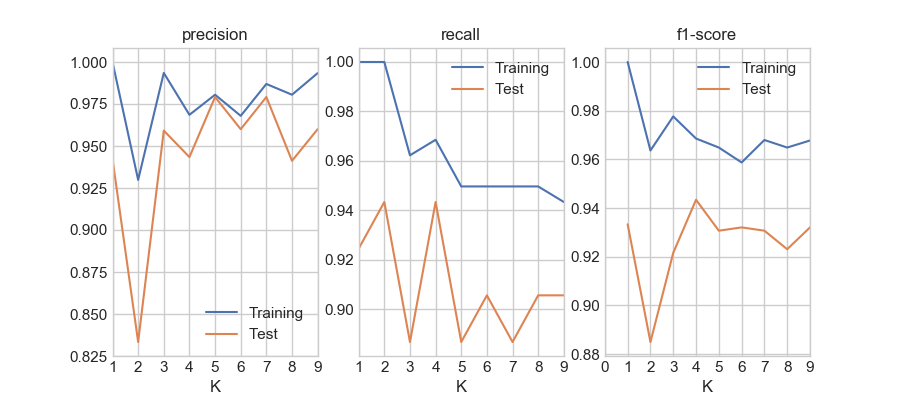

<IPython.core.display.Javascript object>


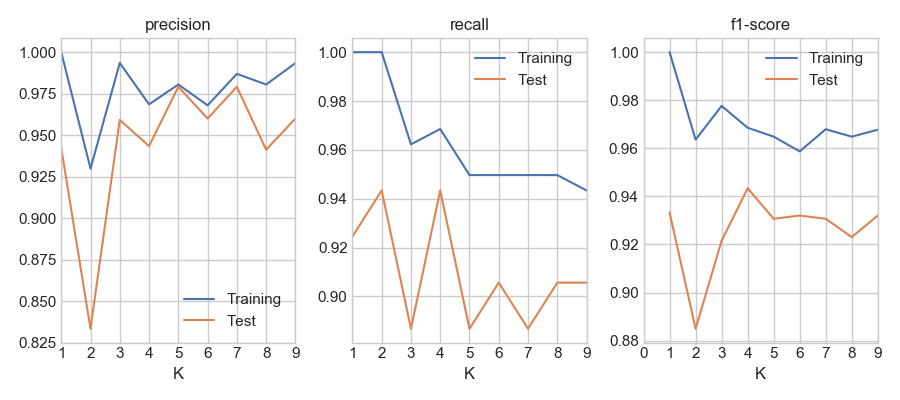

In [106]:
fig, axes = plt.subplots(num=11, nrows=1, ncols=3, sharex=True, figsize=[9,4], dpi=100, clear=True)

dfTrn['precision'].plot(ax = axes[0],title = 'precision')
dfTst['precision'].plot(ax = axes[0])

dfTrn['recall'].plot(ax = axes[1],title = 'recall')
dfTst['recall'].plot(ax = axes[1])

dfTrn['f1-score'].plot(ax = axes[2],title = 'f1-score')
dfTst['f1-score'].plot(ax = axes[2])

axes[0].legend(['Training','Test'])
axes[1].legend(['Training','Test'])
axes[2].legend(['Training','Test'])


major_ticks = np.arange(0, 10, 1)
plt.xticks(major_ticks)

plt.show()
fig.tight_layout()

**Points: 0.2**  
Plot the confusion matrix for a model using k= 4

<IPython.core.display.Javascript object>


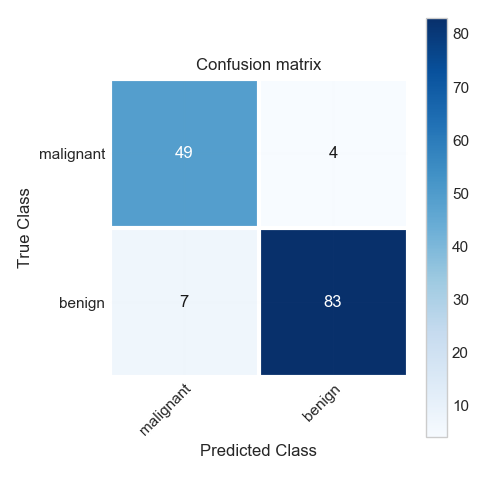

In [107]:
fignum = 12
nNeighbors = 4
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
gutil_plot_confusion_matrix(fignum,Y_test,Y_pred,class_names = target_names)

## Exercise 6
kNN again but with PCA.  

[Instructions](#Instructions)

**Points: 0.5**  
Define a function that uses Standardized scaling of the data to calculate the PCA, then fits a kNN model using the transformed data. This combines a lot of the same processing pipeline as exercise 5.
- The first 4 inputs are the usual X_train, Y_train, X_test, Y_test
- nMaxK is the maximum k value (inclusive) for training a kNN classifier.
- Use the classification_report metric to simultaneously calculate `precision`, `recall`, and `f1-score`
- Use the value calculated for the `malignant` class
- The output is a tuple consisting of two dataframes.
- The first dataframe is for training results, the second is for test results. For both:
  - The index is the K value named `K`
  - The columns are named for their metric
- Remember to use the same transform that was fit with training data when you transform the test data
- Remember to use transformed data when predicting


In [114]:
def knn_pca_metrics( X_train, Y_train, X_test, Y_test, target_names, nMaxK, nComponents):
    df_train = pd.DataFrame(columns=['K','precision','recall', 'f1-score'],index=range(nMaxK+1))
    df_test= pd.DataFrame(columns=['K','precision','recall', 'f1-score'],index=range(nMaxK+1))
    scl = StandardScaler()
    scl.fit(X_train)
    #X_train = scl.transform(X_train)
    #X_test = scl.transform(X_test)
    pca = PCA(n_components=nComponents)
    pca.fit(X_train)
    X_train = pca.fit_transform(X_train)
    X_test = pca.fit_transform(X_test)
    for k in np.arange(1,nMaxK+1):
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, Y_train)
        pred_train = knn.predict(X_train)
        clf_train = classification_report(Y_train, pred_train,output_dict=True,target_names=target_names)['malignant']
        df_train.loc[k].K = k
        df_train.loc[k].precision = clf_train['precision']
        df_train.loc[k].recall = clf_train['recall']
        df_train.loc[k]['f1-score'] = clf_train['f1-score'] 
        pred_test = knn.predict(X_test)
        clf_test = classification_report(Y_test, pred_test,output_dict=True,target_names=target_names)['malignant']
        df_test.loc[k].K = k
        df_test.loc[k].precision = clf_test['precision']
        df_test.loc[k].recall = clf_test['recall']
        df_test.loc[k]['f1-score'] = clf_test['f1-score']    
    df_train.set_index('K',inplace = True)
    df_train.dropna(inplace = True)
    df_test.set_index('K',inplace = True)
    df_test.dropna(inplace = True)
    return (df_train,df_test)

In [115]:
## This is an automatically graded test cell.
# The public tests help you determine whether your solutions are correct.                          
# It also contains hidden tests that are run by the autograder.

nMaxK = 9
nComponents = 3
(dfTrnPca, dfTstPca) = knn_pca_metrics( X_train, Y_train, X_test, Y_test, target_names, nMaxK, nComponents)

# Public tests (make sure your function passes these tests)
# ---------------------------------------------------------
np.testing.assert_almost_equal(dfTstPca['precision'].values[0:5], [0.8727, 0.8197, 0.8889, 0.8571, 0.8889], decimal=4)
assert sorted(dfTrnPca.columns.values) == sorted(['precision', 'recall', 'f1-score'])
assert dfTstPca.index.name == 'K'

AssertionError: 
Arrays are not almost equal to 4 decimals

Mismatch: 100%
Max absolute difference: 0.19154057971014493
Max relative difference: 0.21948043968161443
 x: array([0.6811594202898551, 0.6753246753246753, 0.746268656716418,
       0.7246376811594203, 0.7352941176470589], dtype=object)
 y: array([0.8727, 0.8197, 0.8889, 0.8571, 0.8889])

**Points: 0.2**  
Plot these metrics in the same way as Exercise 5. They should look like this:
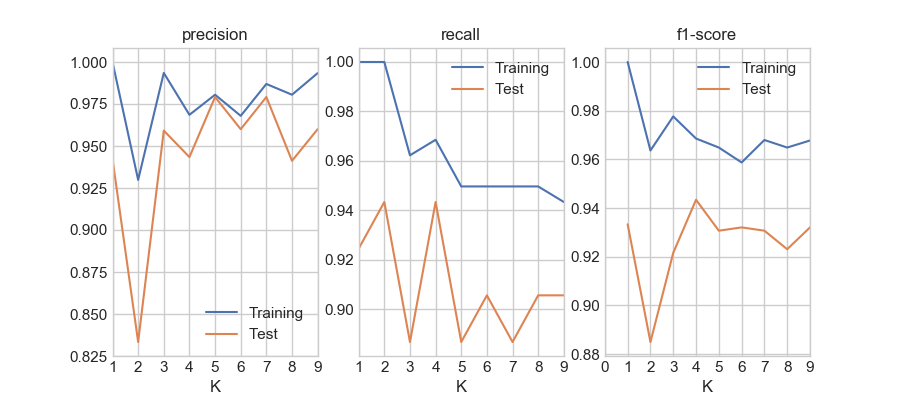

In [ ]:
fig, axes = plt.subplots(num=13, nrows=1, ncols=3, sharex=True, figsize=[9,4], dpi=100, clear=True)


dfTrnPca['precision'].plot(ax = axes[0],title = 'precision')
dfTstPca['precision'].plot(ax = axes[0],title = 'precision')

dfTrnPca['recall'].plot(ax = axes[1],title = 'recall')
dfTstPca['recall'].plot(ax = axes[1],title = 'recall')

dfTrnPca['f1-score'].plot(ax = axes[2],title = 'f1-score')
dfTstPca['f1-score'].plot(ax = axes[2],title = 'f1-score')

axes[0].legend(['Training','Test'])
axes[1].legend(['Training','Test'])
axes[2].legend(['Training','Test'])


major_ticks = np.arange(0, 10, 1)
plt.xticks(major_ticks)
plt.show()
fig.tight_layout()

**Points: 0.1**  
Define a function that finds the best metric in two dataframes.
- sMetric will be one of the 3 metric names
- return dataframe 
  - will have two rows named `All-Features` and `PCA-n` where n is the number of PCA components used
  - will have two columns named `K` and the metric name

In [ ]:
def best_f1_score( dfTst, dfTstPca, sMetric, nPCAComponents ):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
## This is an automatically graded test cell.
# The public tests help you determine whether your solutions are correct.                          
# It also contains hidden tests that are run by the autograder.

sMetric = 'f1-score'
df = best_f1_score( dfTst, dfTstPca, sMetric, nComponents )
assert sorted( df.columns.values ) == sorted( ['K', sMetric])
np.testing.assert_almost_equal( df[sMetric], [0.943396, 0.899083], decimal=4)

# Public tests (make sure your function passes these tests)
# ---------------------------------------------------------



Just for illustration, lets plot the 3 principle components using all the data.


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(14, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], 
           c=Y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()